In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, GridSearchCV

In [4]:
p_Data = pd.read_csv("fellow_data.csv")

# Data Challenge

## Introduction

Understanding what makes someone more likely to be hired is crucial to give the best advice and understand where they can improve. Since people have many different backgrounds, a pattern in the data may be hard to see. We try to see if we can leverage machine learning to optimize our candidate selection and mentorship focus.

### Problems

1. What kind of candidate is most likely to be placed at a company? Create a classification model to predict if a candidate will be placed.
2. If they are placed, how long will it take? Create a regression model to predict time to placement.

### Data Available

In [5]:
p_Data.head(10)

,id,pathrise_status,primary_track,cohort_tag,program_duration_days,placed,employment_status,highest_level_of_education,length_of_job_search,biggest_challenge_in_search,professional_experience,work_authorization_status,number_of_interviews,number_of_applications,gender,race
0,1,Active,SWE,OCT19A,NaN,0,Unemployed,Bachelor's Degree,3-5 months,Hearing back on my applications,3-4 years,Canada Citizen,2.0,900,Male,Non-Hispanic White or Euro-American
1,2,Active,PSO,JAN20A,NaN,0,Unemployed,"Some College, No Degree",3-5 months,Getting past final round interviews,1-2 years,Citizen,6.0,0,Male,Non-Hispanic White or Euro-American
2,3,Closed Lost,Design,AUG19B,0.0,0,Employed Part-Time,Master's Degree,Less than one month,Figuring out which jobs to apply for,Less than one year,Citizen,0.0,0,Male,East Asian or Asian American
3,4,Closed Lost,PSO,AUG19B,0.0,0,Contractor,Bachelor's Degree,Less than one month,Getting past final round interviews,Less than one year,Citizen,5.0,25,Male,Decline to Self Identify
4,5,Placed,SWE,AUG19A,89.0,1,Unemployed,Bachelor's Degree,1-2 months,Hearing back on my applications,1-2 years,F1 Visa/OPT,10.0,100,Male,East Asian or Asian American
5,6,Closed Lost,SWE,AUG19A,0.0,0,Employed Full-Time,Master's Degree,1-2 months,Technical interviewing,3-4 years,Green Card,5.0,100,Male,East Asian or Asian American
6,7,Closed Lost,SWE,AUG19B,0.0,0,Employed Full-Time,Master's Degree,Less than one month,Getting past phone screens,3-4 years,Green Card,0.0,9,Male,"Black, Afro-Caribbean, or African American"
7,8,Withdrawn (Failed),SWE,AUG19A,19.0,0,Employed Part-Time,Bachelor's Degree,Less than one month,Getting past final round interviews,1-2 years,Citizen,4.0,15,Female,Latino or Hispanic American
8,9,Active,SWE,AUG19B,NaN,0,Student,Master's Degree,Less than one month,Technical interviewing,1-2 years,F1 Visa/CPT,1.0,5,Male,East Asian or Asian American
9,10,Withdrawn (Trial),SWE,SEP19A,13.0,0,Employed Full-Time,Master's Degree,Less than one month,Getting past final round interviews,3-4 years,Citizen,0.0,10,Male,"Black, Afro-Caribbean, or African American"


In [6]:
p_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2544 entries, 0 to 2543
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           2544 non-null   int64  
 1   pathrise_status              2544 non-null   object 
 2   primary_track                2544 non-null   object 
 3   cohort_tag                   2536 non-null   object 
 4   program_duration_days        1928 non-null   float64
 5   placed                       2544 non-null   int64  
 6   employment_status            2315 non-null   object 
 7   highest_level_of_education   2486 non-null   object 
 8   length_of_job_search         2470 non-null   object 
 9   biggest_challenge_in_search  2520 non-null   object 
 10  professional_experience      2322 non-null   object 
 11  work_authorization_status    2260 non-null   object 
 12  number_of_interviews         2326 non-null   float64
 13  number_of_applicat

In [7]:
# percentage of null values in each column
(p_Data.isnull().sum()/2544)*100

id                              0.000000
pathrise_status                 0.000000
primary_track                   0.000000
cohort_tag                      0.314465
program_duration_days          24.213836
placed                          0.000000
employment_status               9.001572
highest_level_of_education      2.279874
length_of_job_search            2.908805
biggest_challenge_in_search     0.943396
professional_experience         8.726415
work_authorization_status      11.163522
number_of_interviews            8.569182
number_of_applications          0.000000
gender                         19.339623
race                            0.707547
dtype: float64

Our data consists of 2544 rows (each representing a fellow) and 16 columns, 12 of which will be used as features (feature selection will be discussed later). We see that we mostly have variables of type object that we will have to encode. From the output above, we see that some columns have missing values. You can either remove rows with empty values or fill them in with the most likely value (mean, median, mode). Since we are dealing with low amounts of data, removing rows does not seem like it will give us the best results. We could also try algorithms that work well with missing values. Explanation of feature names is in the excel file.

### Exploratory Data Analysis (EDA)

In [8]:
nstats = p_Data.describe()
nstats[["program_duration_days", "number_of_interviews", "number_of_applications", "placed"]]

,program_duration_days,number_of_interviews,number_of_applications,placed
count,1928.000000,2326.000000,2544.000000,2544.000000
mean,136.098548,2.182287,36.500786,0.375786
std,125.860248,2.959273,53.654896,0.484420
min,0.000000,0.000000,0.000000,0.000000
25%,14.000000,0.000000,9.000000,0.000000
50%,112.000000,1.000000,20.000000,0.000000
75%,224.000000,3.000000,45.000000,1.000000
max,548.000000,20.000000,1000.000000,1.000000


With the output above, we can take a look at the basic stats of our numerical variables. Some interesting numbers are that the percent of fellows placed in this data set is 37.58% and fellows usually spend about 4 months in the program. It is important to note that in this dataset, there is an inclusion of people who are still looking for jobs, did not accept to be part of pathrise, or have not been placed for other reasons. the 38% placement rate is not wholly representative of what Pathrise can control in their business processes.

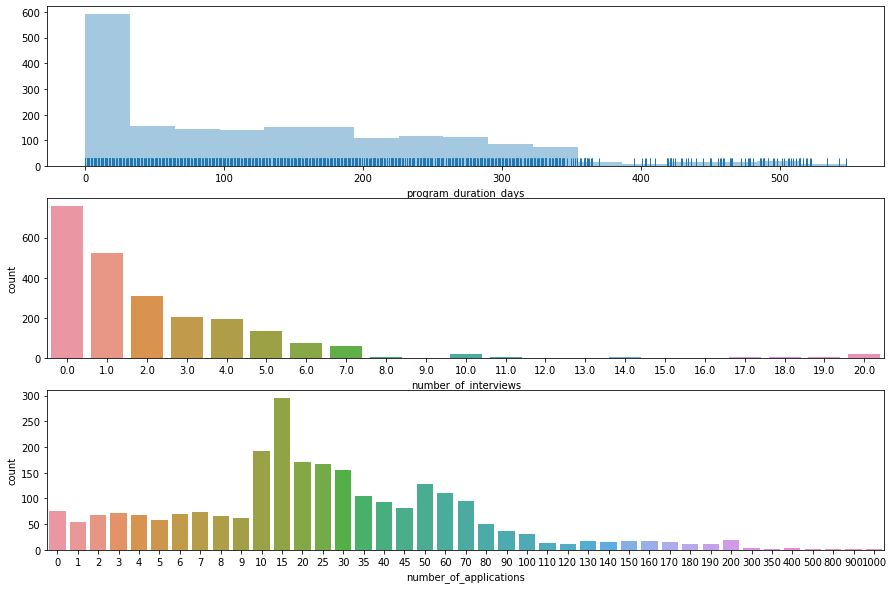

In [9]:
fig = plt.figure(figsize = (15,10))

pdd = fig.add_subplot(3,1,1)
sns.distplot(p_Data["program_duration_days"], kde = False, ax = pdd, rug = True)

ni = fig.add_subplot(3,1,2)
sns.countplot(data = p_Data, x = "number_of_interviews", ax = ni)

na = fig.add_subplot(3,1,3)
sns.countplot(data = p_Data, x = "number_of_applications", ax = na)

Our data does not have a nice normal distribution so we may have to do some data transformations.

In [10]:
p_Data.corr()

,id,program_duration_days,placed,number_of_interviews,number_of_applications
id,1.000000,0.041449,-0.035391,-0.015318,-0.072675
program_duration_days,0.041449,1.000000,0.197222,-0.065043,-0.064783
placed,-0.035391,0.197222,1.000000,-0.007156,-0.028364
number_of_interviews,-0.015318,-0.065043,-0.007156,1.000000,0.071406
number_of_applications,-0.072675,-0.064783,-0.028364,0.071406,1.000000


We don't find any linear dependence between any of the numerical variables.

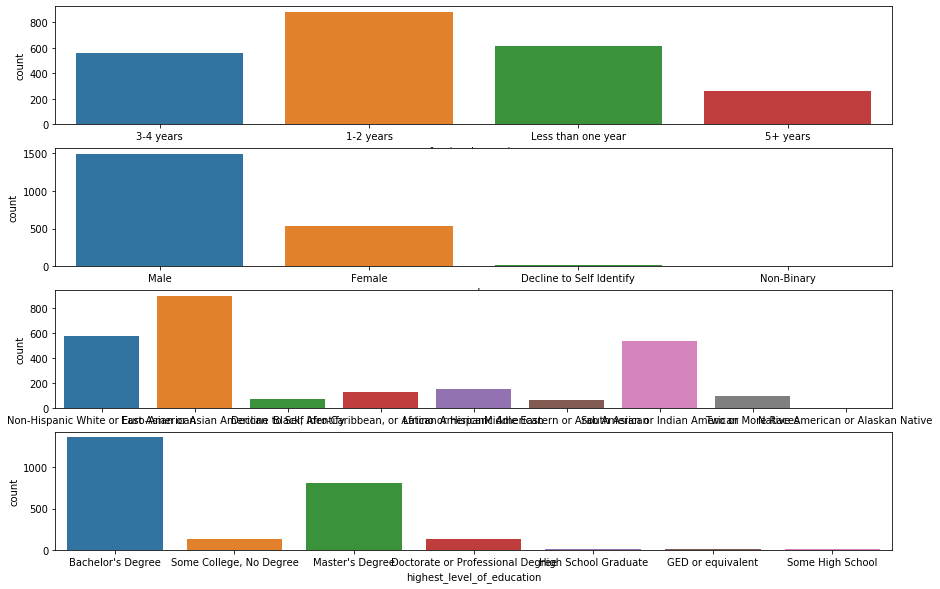

In [11]:
fig = plt.figure(figsize = (15,10))

pex = fig.add_subplot(4,1,1)
sns.countplot(p_Data["professional_experience"], ax = pex)

g = fig.add_subplot(4,1,2)
sns.countplot(data = p_Data, x = "gender", ax = g)

r = fig.add_subplot(4,1,3)
sns.countplot(data = p_Data, x = "race", ax = r)

ed = fig.add_subplot(4,1,4)
sns.countplot(data = p_Data, x = "highest_level_of_education", ax = ed)

Above, we take a look at a few distributions of the categorical variables.

### Data Preparation

In [12]:
p_Data.duplicated().sum()

0

#### Encoding

We need to convert the object type variables into numbers so the machine learning algorithm can use them. Some variables have an inherent ranking (such as education level and professional experience) where one category is better than another. Other variables have no order (such as gender, race) so we will try to encode them differently.

In [13]:
# encoding ordinal variables

scale_mapper_ed = {"Some High School":1, 
                   "High School Graduate":2, 
                   "GED or equivalent":3, 
                   'Some College, No Degree':4, 
                   "Bachelor's Degree":5, 
                   "Master's Degree":6, 
                   "Doctorate or Professional Degree":7}

p_Data["highest_level_of_education"] = p_Data["highest_level_of_education"].replace(scale_mapper_ed)

scale_mapper_prof = {"nan":0, 
                   "Less than one year":1, 
                   "1-2 years":2, 
                   "3-4 years":3, 
                   "5+ years":4}

p_Data["professional_experience"] = p_Data["professional_experience"].replace(scale_mapper_prof)


scale_mapper_js = {"nan": 0,
                  "Less than one month":1,
                  "1-2 months":2,
                  "3-5 months":3,
                  "6 months to a year":4,
                  "Over a year":5}

p_Data["length_of_job_search"] = p_Data["length_of_job_search"].replace(scale_mapper_js)

In [14]:
p_Data.head()

,id,pathrise_status,primary_track,cohort_tag,program_duration_days,placed,employment_status,highest_level_of_education,length_of_job_search,biggest_challenge_in_search,professional_experience,work_authorization_status,number_of_interviews,number_of_applications,gender,race
0,1,Active,SWE,OCT19A,NaN,0,Unemployed,5.0,3.0,Hearing back on my applications,3.0,Canada Citizen,2.0,900,Male,Non-Hispanic White or Euro-American
1,2,Active,PSO,JAN20A,NaN,0,Unemployed,4.0,3.0,Getting past final round interviews,2.0,Citizen,6.0,0,Male,Non-Hispanic White or Euro-American
2,3,Closed Lost,Design,AUG19B,0.0,0,Employed Part-Time,6.0,1.0,Figuring out which jobs to apply for,1.0,Citizen,0.0,0,Male,East Asian or Asian American
3,4,Closed Lost,PSO,AUG19B,0.0,0,Contractor,5.0,1.0,Getting past final round interviews,1.0,Citizen,5.0,25,Male,Decline to Self Identify
4,5,Placed,SWE,AUG19A,89.0,1,Unemployed,5.0,2.0,Hearing back on my applications,2.0,F1 Visa/OPT,10.0,100,Male,East Asian or Asian American


In [15]:
# imputing 0 for empty values in nominal variables to prep for encoding
# not include placed (target) column

cat_variables = p_Data[["pathrise_status", "primary_track", "employment_status ", "length_of_job_search", "biggest_challenge_in_search", "work_authorization_status", "gender", "race"]]
imputer0 = SimpleImputer(strategy = "constant", fill_value = 0)
imputer0.fit(cat_variables.values)
imputed_cat = pd.DataFrame(imputer0.transform(cat_variables.values))
imputed_cat.isnull().sum()

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
dtype: int64

In [17]:
# imputed_cat.columns = ["pathrise_status", "primary_track", "employment_status ", "length_of_job_search", "biggest_challenge_in_search", "work_authorization_status", "gender", "race"]

status = pd.get_dummies(imputed_cat["pathrise_status"])
track = pd.get_dummies(imputed_cat["primary_track"])
employment = pd.get_dummies(imputed_cat["employment_status "])
jobSearch = pd.get_dummies(imputed_cat["length_of_job_search"])
challenge = pd.get_dummies(imputed_cat["biggest_challenge_in_search"])
authorization = pd.get_dummies(imputed_cat["work_authorization_status"])
gender = pd.get_dummies(imputed_cat["gender"])
race = pd.get_dummies(imputed_cat["race"])

In [18]:
# employment.drop([0], axis = 1, inplace = True)
# jobSearch.drop([0], axis = 1, inplace = True)
# challenge.drop([0], axis = 1, inplace = True)
# authorization.drop([0], axis = 1, inplace = True)
# gender.drop([0], axis = 1, inplace = True)
# race.drop([0], axis = 1, inplace = True)
# gender.rename(columns = {"Decline to Self Identify": "Decline Gender"},
#              inplace = True)
# race.rename(columns = {"Decline to Self Identify": "Decline Race"},
#              inplace = True)

In [19]:
numerics = p_Data[["highest_level_of_education", "professional_experience", "number_of_interviews", "number_of_applications"]]
numerics

,highest_level_of_education,professional_experience,number_of_interviews,number_of_applications
0,5.0,3.0,2.0,900
1,4.0,2.0,6.0,0
2,6.0,1.0,0.0,0
3,5.0,1.0,5.0,25
4,5.0,2.0,10.0,100
...,...,...,...,...
2539,6.0,4.0,4.0,15
2540,6.0,2.0,1.0,7
2541,5.0,2.0,1.0,30
2542,6.0,2.0,2.0,10


In [20]:
encoded_cat = status.join(track).join(employment).join(jobSearch).join(challenge).join(authorization).join(gender).join(race)

In [ ]:
encoded_cat.drop("Placed", axis = 1, inplace= True)

In [23]:
encoded_cat

,Active,Break,Closed Lost,Deferred,MIA,Withdrawn,Withdrawn (Failed),Withdrawn (Trial),Data,Design,...,Non-Binary,"Black, Afro-Caribbean, or African American",Decline Race,East Asian or Asian American,Latino or Hispanic American,Middle Eastern or Arab American,Native American or Alaskan Native,Non-Hispanic White or Euro-American,South Asian or Indian American,Two or More Races
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2539,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2540,0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2541,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2542,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


### Classifier Model

In [23]:
dataset = encoded_cat.join(numerics)
imputer0.fit(dataset.values)
imputed_dat = pd.DataFrame(imputer0.transform(dataset.values))

target = p_Data["placed"].values
trainarr = imputed_dat.values


X_train, X_test, y_train, y_test = train_test_split(
    trainarr, target, test_size = .30, random_state = 42)

print("Number of observations in the training data:", len(X_train))
print("Number of observations in the test data:", len(X_test))

Number of observations in the training data: 1780
Number of observations in the test data: 764


In [24]:
clf = RandomForestClassifier()

clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [25]:
clf.score(X_test, y_test)

0.9973821989528796

In [26]:
rf_predictions = clf.predict(X_test)

In [27]:
print(accuracy_score(y_test, rf_predictions))
confusion_matrix(y_test, rf_predictions)

0.9973821989528796


array([[455,   0],
       [  2, 307]])

Looks like we are could be either overfitting or there isnt enough data to work with. Random Forest, which is good at preventing overfitting, returned 99.8% percent accuracy. Normally this would be good, but with machine learning, you have to take a closer look at what is happening. Maybe there is some data leakage (telling the algorithm the answer in the training data).

Feature: 0, Score: 0.21581
Feature: 1, Score: 0.01717
Feature: 2, Score: 0.07261
Feature: 3, Score: 0.01471
Feature: 4, Score: 0.02695
Feature: 5, Score: 0.16036
Feature: 6, Score: 0.03754
Feature: 7, Score: 0.11550
Feature: 8, Score: 0.00385
Feature: 9, Score: 0.00476
Feature: 10, Score: 0.00006
Feature: 11, Score: 0.00665
Feature: 12, Score: 0.00908
Feature: 13, Score: 0.00063
Feature: 14, Score: 0.00468
Feature: 15, Score: 0.00660
Feature: 16, Score: 0.00464
Feature: 17, Score: 0.00794
Feature: 18, Score: 0.00735
Feature: 19, Score: 0.00794
Feature: 20, Score: 0.00746
Feature: 21, Score: 0.00741
Feature: 22, Score: 0.00499
Feature: 23, Score: 0.00393
Feature: 24, Score: 0.00281
Feature: 25, Score: 0.00486
Feature: 26, Score: 0.00657
Feature: 27, Score: 0.00414
Feature: 28, Score: 0.00432
Feature: 29, Score: 0.00787
Feature: 30, Score: 0.00438
Feature: 31, Score: 0.00177
Feature: 32, Score: 0.00556
Feature: 33, Score: 0.00148
Feature: 34, Score: 0.00140
Feature: 35, Score: 0.00893
Fe

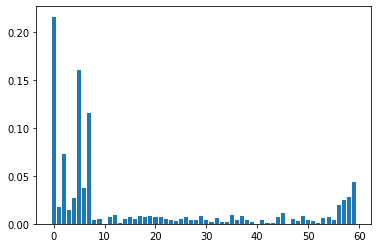

In [28]:
importance = clf.feature_importances_
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
    
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Features 0 (Active), 5 (Withdrawn), and 7 (Withdrawn (Trial)) are very important to predicting fellow placement. Most likely, this is leaking the answer into the training data. If a fellow is active that means he cannot have been placed and a fellow that has withdrawn in the trial period greatly influences the placement outcome.

In [30]:
# encoded_cat.drop(["Active"], axis = 1, inplace= True)

In [31]:
dataset = encoded_cat.join(numerics)
imputer0.fit(dataset.values)
imputed_dat = pd.DataFrame(imputer0.transform(dataset.values))

target = p_Data["placed"].values
trainarr = imputed_dat.values


X_train, X_test, y_train, y_test = train_test_split(
    trainarr, target, test_size = .10, random_state = 30)

print("Number of observations in the training data:", len(X_train))
print("Number of observations in the test data:", len(X_test))

Number of observations in the training data: 2289
Number of observations in the test data: 255


In [32]:
clf = RandomForestClassifier()

clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [33]:
rf_predictions = clf.predict(X_test)
print(accuracy_score(y_test, rf_predictions))
confusion_matrix(y_test, rf_predictions)

0.7725490196078432


array([[133,  34],
       [ 24,  64]])

Feature: 0, Score: 0.01005
Feature: 1, Score: 0.05578
Feature: 2, Score: 0.01022
Feature: 3, Score: 0.01624
Feature: 4, Score: 0.12006
Feature: 5, Score: 0.02845
Feature: 6, Score: 0.08480
Feature: 7, Score: 0.00709
Feature: 8, Score: 0.00816
Feature: 9, Score: 0.00015
Feature: 10, Score: 0.01190
Feature: 11, Score: 0.01658
Feature: 12, Score: 0.00050
Feature: 13, Score: 0.00812
Feature: 14, Score: 0.01340
Feature: 15, Score: 0.01184
Feature: 16, Score: 0.01836
Feature: 17, Score: 0.01695
Feature: 18, Score: 0.01532
Feature: 19, Score: 0.01640
Feature: 20, Score: 0.01530
Feature: 21, Score: 0.01005
Feature: 22, Score: 0.00793
Feature: 23, Score: 0.00500
Feature: 24, Score: 0.00868
Feature: 25, Score: 0.01105
Feature: 26, Score: 0.00903
Feature: 27, Score: 0.00789
Feature: 28, Score: 0.01831
Feature: 29, Score: 0.01044
Feature: 30, Score: 0.00288
Feature: 31, Score: 0.01126
Feature: 32, Score: 0.00292
Feature: 33, Score: 0.00222
Feature: 34, Score: 0.01965
Feature: 35, Score: 0.00715
Fe

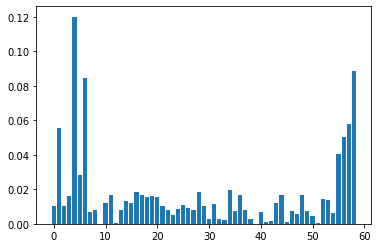

In [34]:
importance = clf.feature_importances_
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
    
plt.bar([x for x in range(len(importance))], importance)
plt.show()

We tried removing Withdrawn and Withdrawn (Trial) but we got 60% accuracy, suggesting that we were removing too much of the data. Tuning max depth and features did not give any model improvements. Withdrawn and Withdrawn (Trial) still have high influence, but now that Active is gone, the numeric variables such as number of interviews and number of applications can have more influence.

Ultimately, we have a model that predicts the test data accurately almost perfectly because there are leaky features and a model that predicts correctly 77% of the time without a lot of false positives, which given Pathrise's objectives, is the worse of the two model errors. It is up to Pathrise to decide whether to accept 77% accuracy or find other ways to imporove the model, though we can still get good info from our results. From a business stand point, the data suggests that fellows will perform better with more applications and interviews, so a program that emphasizes the the things that lead to more interviews would perform well. This could mean a good resume, project portfolio, and networking with people that can get you interviews.

### How Long Will It Take Fellows to Find A Job?

In [35]:
# to have a shot at estimating the population time to placement, we must remove fellows that have not found a job
reg_data = p_Data[p_Data["placed"] == 1]
reg_data = reg_data[["employment_status ", 
                     "highest_level_of_education", 
                     "length_of_job_search", 
                     "biggest_challenge_in_search",
                     "professional_experience",
                     "work_authorization_status",
                     "number_of_interviews",
                     "number_of_applications"]]
reg_data

,employment_status,highest_level_of_education,length_of_job_search,biggest_challenge_in_search,professional_experience,work_authorization_status,number_of_interviews,number_of_applications
4,Unemployed,5.0,2.0,Hearing back on my applications,2.0,F1 Visa/OPT,10.0,100
23,Unemployed,6.0,4.0,Hearing back on my applications,2.0,Citizen,5.0,4
30,Student,6.0,1.0,Figuring out which jobs to apply for,2.0,F1 Visa/CPT,0.0,1
39,Employed Full-Time,6.0,3.0,Getting past final round interviews,4.0,F1 Visa/OPT,NaN,15
54,Student,6.0,1.0,Getting past final round interviews,3.0,F1 Visa/OPT,0.0,30
...,...,...,...,...,...,...,...,...
2527,Student,5.0,NaN,Figuring out which jobs to apply for,1.0,NaN,6.0,6
2528,Student,7.0,1.0,Technical interviewing,4.0,Other,NaN,45
2531,Unemployed,7.0,1.0,Technical skills,NaN,F1 Visa/OPT,0.0,6
2533,NaN,5.0,2.0,Hearing back on my applications,3.0,F1 Visa/OPT,0.0,9


In [36]:
employment = pd.get_dummies(reg_data["employment_status "])
challenge = pd.get_dummies(reg_data["biggest_challenge_in_search"])
work = pd.get_dummies(reg_data["work_authorization_status"])
reg_data = reg_data.drop(["employment_status ", "biggest_challenge_in_search", "work_authorization_status"], axis = 1)

In [37]:
reg_data = reg_data.join(employment).join(work).join(challenge)
reg_data

,highest_level_of_education,length_of_job_search,professional_experience,number_of_interviews,number_of_applications,Contractor,Employed Full-Time,Employed Part-Time,Student,Unemployed,...,Behavioral interviewing,Figuring out which jobs to apply for,Getting past final round interviews,Getting past mid-stage interviews,Getting past phone screens,Hearing back on my applications,Lack of relevant experience,Resume gap,Technical interviewing,Technical skills
4,5.0,2.0,2.0,10.0,100,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
23,6.0,4.0,2.0,5.0,4,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
30,6.0,1.0,2.0,0.0,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
39,6.0,3.0,4.0,NaN,15,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
54,6.0,1.0,3.0,0.0,30,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2527,5.0,NaN,1.0,6.0,6,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
2528,7.0,1.0,4.0,NaN,45,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2531,7.0,1.0,NaN,0.0,6,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2533,5.0,2.0,3.0,0.0,9,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [38]:
# impute missing data with mode (since we have non-normal data)
imp_mode = SimpleImputer(missing_values = np.nan, strategy = "most_frequent")
imp_mode.fit(reg_data.values)
imputed_data = pd.DataFrame(imp_mode.transform(reg_data.values))

In [39]:
imputed_data

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,5.0,2.0,2.0,10.0,100.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,6.0,4.0,2.0,5.0,4.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,6.0,1.0,2.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6.0,3.0,4.0,0.0,15.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,6.0,1.0,3.0,0.0,30.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
951,5.0,2.0,1.0,6.0,6.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
952,7.0,1.0,4.0,0.0,45.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
953,7.0,1.0,2.0,0.0,6.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
954,5.0,2.0,3.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [51]:
placed = p_Data[p_Data["placed"] == 1]
only_nums = placed[["highest_level_of_education","number_of_interviews"]]

imp_mode.fit(only_nums.values)
only_nums = pd.DataFrame(imp_mode.transform(only_nums.values))

scaler = StandardScaler()
print(scaler.fit(only_nums))

scaled = pd.DataFrame(scaler.transform(only_nums))

StandardScaler(copy=True, with_mean=True, with_std=True)


In [52]:
onlyplaced = p_Data[p_Data["placed"] == 1]
y = onlyplaced["program_duration_days"].values
X = scaled.values


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = .20, random_state = 42)

print("Number of observations in the training data:", len(X_train))
print("Number of observations in the test data:", len(X_test))

Number of observations in the training data: 764
Number of observations in the test data: 192


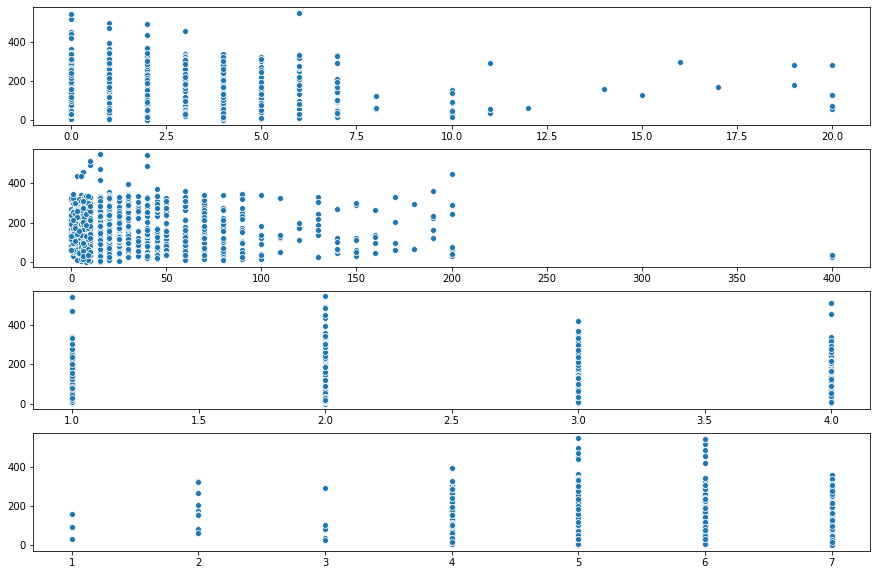

In [50]:
fig = plt.figure(figsize = (15,10))

a = fig.add_subplot(4,1,1)
sns.scatterplot(placed["number_of_interviews"].values,placed["program_duration_days"].values, ax = a)

b = fig.add_subplot(4,1,2)
sns.scatterplot(placed["number_of_applications"].values, placed["program_duration_days"].values, ax = b)

c = fig.add_subplot(4,1,3)
sns.scatterplot(placed["professional_experience"].values, placed["program_duration_days"].values, ax = c)

d = fig.add_subplot(4,1,4)
sns.scatterplot(placed["highest_level_of_education"].values, placed["program_duration_days"].values, ax = d)
                   

Taking a look at the data, it is hard to say that there is a relationship between program day duration (target) and any of the variables that we could use to make a predictive model. The data seems to suggest that fellows will spend however much time in the program regardless of how much education, professional experience, or interviews you've had prior to becoming a fellow. To make sure, a few regression algorithms were used to see im a model could be made. They were all unusable to predict time to placement. Number of interviews and professional experience seem to have a shape but it is because there are simply less people submitting a high number of applications and more people will have bachelors and masters degrees. Other variables such as race and gender were not considered in the model because making business decisions based on them would be unethical.

In [54]:
# regr = RandomForestRegressor()
# regr.fit(X_train, y_train)
# regr.score(X_test, y_test)

-0.020031812844679253

In my opinion, the data suggests that the way people look for jobs is fundamentally inefficient. Successful outcomes in the job search depends on optimizing aspects that are not represented in this dataset such as resume, portfolio and networking. Based on this info, it would be better to focus on the factors that get people placed rather than trying to estimate how long it is going to take them based on what they did before the program (which is the kind of data we had to work with and examined). Of course, one can and should look for ways to help fellows get placed faster, but that may come from features in the program itself. Then, each change can be analyzed in its marginal change (how did this one feature change placement time, all other things equal).